In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import scipy.stats as stats

dataset is from: [ibbveri](https://data.ibb.gov.tr/dataset/saatlik-trafik-yogunluk-veri-seti/resource/db9c7fb3-e7f9-435a-92f4-1b917e357821)

In [2]:
df = pd.read_csv('data/traffic_density_202001.csv')
df.head()

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,2020-01-03 13:00:00,28.844604,41.113586,sxk9bk,9,78,53,105
1,2020-01-16 07:00:00,29.152222,41.009216,sxk9r3,6,64,27,68
2,2020-01-17 20:00:00,28.471069,41.042175,sxk1rz,53,96,72,11
3,2020-01-14 22:00:00,29.360962,40.816956,sxkbhn,17,128,73,216
4,2020-01-17 20:00:00,28.844604,40.970764,sxk906,16,82,55,123


In [3]:
df = df.drop(columns=["LONGITUDE","LATITUDE"])

In [4]:
df.head()

,DATE_TIME,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,2020-01-03 13:00:00,sxk9bk,9,78,53,105
1,2020-01-16 07:00:00,sxk9r3,6,64,27,68
2,2020-01-17 20:00:00,sxk1rz,53,96,72,11
3,2020-01-14 22:00:00,sxkbhn,17,128,73,216
4,2020-01-17 20:00:00,sxk906,16,82,55,123


In [5]:
df[['date','time']] = df["DATE_TIME"].str.split(" ", 1, expand=True)

In [6]:
df.head()

,DATE_TIME,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,date,time
0,2020-01-03 13:00:00,sxk9bk,9,78,53,105,2020-01-03,13:00:00
1,2020-01-16 07:00:00,sxk9r3,6,64,27,68,2020-01-16,07:00:00
2,2020-01-17 20:00:00,sxk1rz,53,96,72,11,2020-01-17,20:00:00
3,2020-01-14 22:00:00,sxkbhn,17,128,73,216,2020-01-14,22:00:00
4,2020-01-17 20:00:00,sxk906,16,82,55,123,2020-01-17,20:00:00


In [7]:
df = df.drop(columns=["DATE_TIME"])

In [8]:
df.columns

Index(['GEOHASH', 'MINIMUM_SPEED', 'MAXIMUM_SPEED', 'AVERAGE_SPEED',
       'NUMBER_OF_VEHICLES', 'date', 'time'],
      dtype='object')

In [9]:
df = df[["date", "time", "GEOHASH", 'MINIMUM_SPEED', 'MAXIMUM_SPEED', 'AVERAGE_SPEED', 'NUMBER_OF_VEHICLES']]

In [10]:
df

,date,time,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,2020-01-03,13:00:00,sxk9bk,9,78,53,105
1,2020-01-16,07:00:00,sxk9r3,6,64,27,68
2,2020-01-17,20:00:00,sxk1rz,53,96,72,11
3,2020-01-14,22:00:00,sxkbhn,17,128,73,216
4,2020-01-17,20:00:00,sxk906,16,82,55,123
...,...,...,...,...,...,...,...
1328619,2020-01-04,11:00:00,sxk4jy,6,49,22,14
1328620,2020-01-08,15:00:00,sxk1fj,55,132,83,71
1328621,2020-01-04,12:00:00,sx7fr4,55,129,81,90
1328622,2020-01-22,14:00:00,sxk9ge,8,87,43,100


In [11]:
df.columns = ["date", "time", 'geohash', 'min_speed', 'max_speed', 'ave_speed', 'n_of_vehicles']

In [12]:
df

,date,time,geohash,min_speed,max_speed,ave_speed,n_of_vehicles
0,2020-01-03,13:00:00,sxk9bk,9,78,53,105
1,2020-01-16,07:00:00,sxk9r3,6,64,27,68
2,2020-01-17,20:00:00,sxk1rz,53,96,72,11
3,2020-01-14,22:00:00,sxkbhn,17,128,73,216
4,2020-01-17,20:00:00,sxk906,16,82,55,123
...,...,...,...,...,...,...,...
1328619,2020-01-04,11:00:00,sxk4jy,6,49,22,14
1328620,2020-01-08,15:00:00,sxk1fj,55,132,83,71
1328621,2020-01-04,12:00:00,sx7fr4,55,129,81,90
1328622,2020-01-22,14:00:00,sxk9ge,8,87,43,100


In [13]:
df.geohash.unique()

array(['sxk9bk', 'sxk9r3', 'sxk1rz', ..., 'sx7frd', 'sxkcus', 'sx7fpp'],
      dtype=object)

In [14]:
df = df.sort_values(by=['geohash'])
df

,date,time,geohash,min_speed,max_speed,ave_speed,n_of_vehicles
631203,2020-01-21,11:00:00,sx7chk,59,112,82,18
265575,2020-01-15,09:00:00,sx7chk,55,122,88,15
50357,2020-01-04,16:00:00,sx7chk,62,115,79,19
692423,2020-01-07,12:00:00,sx7chk,69,114,87,11
163663,2020-01-25,08:00:00,sx7chk,55,130,85,25
...,...,...,...,...,...,...,...
1032835,2020-01-16,10:00:00,sxm44k,26,94,46,11
660469,2020-01-04,12:00:00,sxm44k,23,92,49,11
1064608,2020-01-30,10:00:00,sxm44k,18,79,47,12
799807,2020-01-29,10:00:00,sxm44k,32,85,55,11


In [15]:
data = df.loc[df['geohash'] == 'sx7chk']
data

,date,time,geohash,min_speed,max_speed,ave_speed,n_of_vehicles
631203,2020-01-21,11:00:00,sx7chk,59,112,82,18
265575,2020-01-15,09:00:00,sx7chk,55,122,88,15
50357,2020-01-04,16:00:00,sx7chk,62,115,79,19
692423,2020-01-07,12:00:00,sx7chk,69,114,87,11
163663,2020-01-25,08:00:00,sx7chk,55,130,85,25
...,...,...,...,...,...,...,...
1220290,2020-01-15,14:00:00,sx7chk,66,110,81,12
845331,2020-01-19,19:00:00,sx7chk,66,132,96,13
426864,2020-01-29,11:00:00,sx7chk,59,133,90,21
772642,2020-01-12,20:00:00,sx7chk,47,133,92,11


In [16]:
data = data.reset_index()
data = data.drop(columns=["index"])
data

,date,time,geohash,min_speed,max_speed,ave_speed,n_of_vehicles
0,2020-01-21,11:00:00,sx7chk,59,112,82,18
1,2020-01-15,09:00:00,sx7chk,55,122,88,15
2,2020-01-04,16:00:00,sx7chk,62,115,79,19
3,2020-01-07,12:00:00,sx7chk,69,114,87,11
4,2020-01-25,08:00:00,sx7chk,55,130,85,25
...,...,...,...,...,...,...,...
431,2020-01-15,14:00:00,sx7chk,66,110,81,12
432,2020-01-19,19:00:00,sx7chk,66,132,96,13
433,2020-01-29,11:00:00,sx7chk,59,133,90,21
434,2020-01-12,20:00:00,sx7chk,47,133,92,11


In [17]:
data.time.unique()

array(['11:00:00', '09:00:00', '16:00:00', '12:00:00', '08:00:00',
       '22:00:00', '18:00:00', '21:00:00', '10:00:00', '19:00:00',
       '13:00:00', '00:00:00', '20:00:00', '15:00:00', '04:00:00',
       '17:00:00', '14:00:00', '06:00:00', '23:00:00', '07:00:00',
       '05:00:00', '01:00:00', '03:00:00', '02:00:00'], dtype=object)

In [18]:
data = data.sort_values(by=['date',"time"])
data

,date,time,geohash,min_speed,max_speed,ave_speed,n_of_vehicles
272,2020-01-01,11:00:00,sx7chk,78,139,100,11
378,2020-01-01,14:00:00,sx7chk,67,116,91,17
104,2020-01-01,15:00:00,sx7chk,66,131,97,17
254,2020-01-01,16:00:00,sx7chk,66,109,94,15
383,2020-01-01,17:00:00,sx7chk,69,115,92,17
...,...,...,...,...,...,...,...
113,2020-01-31,19:00:00,sx7chk,55,127,82,15
409,2020-01-31,20:00:00,sx7chk,27,108,85,25
39,2020-01-31,21:00:00,sx7chk,59,120,91,17
374,2020-01-31,22:00:00,sx7chk,68,121,95,14


In [19]:
np.arange(len(data.date.unique()))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [20]:
data[["date","n_of_vehicles"]].groupby(['date']).sum()

,n_of_vehicles
date,
2020-01-01,157
2020-01-02,189
2020-01-03,234
2020-01-04,330
2020-01-05,173
2020-01-06,178
2020-01-07,130
2020-01-08,72
2020-01-09,112


(0.0, 31.0)

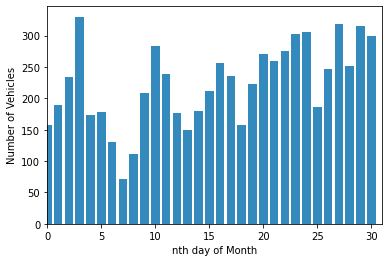

In [21]:
plt.bar(np.arange(len(data.date.unique())), data[["date","n_of_vehicles"]].groupby(['date']).sum().n_of_vehicles, color="#348ABD")
plt.xlabel("nth day of Month")
plt.ylabel("Number of Vehicles")
plt.xlim(0,len(data.date.unique()))

In [22]:
n_of_days = len(data.date.unique())
count_data = data[["date","n_of_vehicles"]].groupby(['date']).sum().n_of_vehicles

In [23]:
len(count_data)

31

In [24]:
import pymc3 as pm
import theano.tensor as tt

with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the , thumb rule
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_of_days - 1)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [25]:
with model:
    idx = np.arange(n_of_days) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

In [26]:
with model:
    observation = pm.Poisson("observed", lambda_, observed=count_data)
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

<ipython-input-26-3a0111d06ab5>:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(10000, tune=5000,step=step)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_2]
>Metropolis: [lambda_1]


Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 153 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [27]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

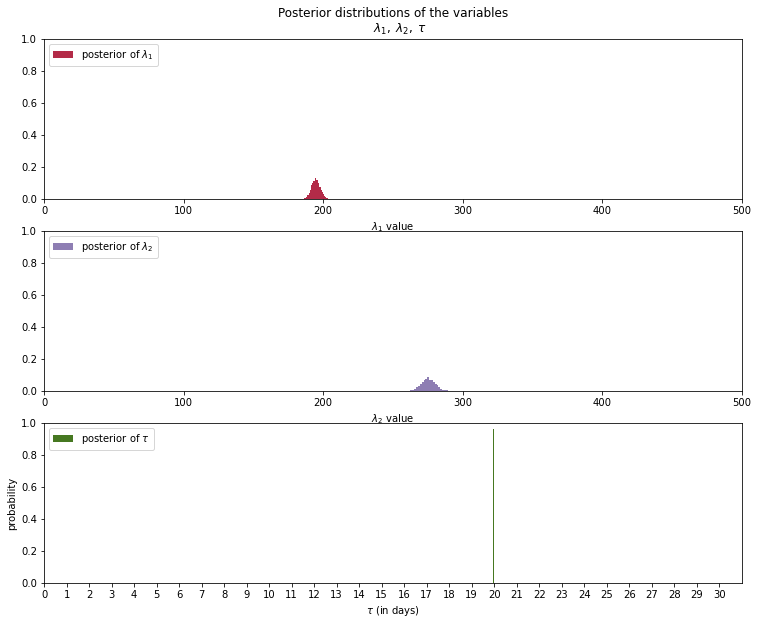

In [28]:
figsize(12.5, 10)
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", density=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([0, 500])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", density=True)
plt.legend(loc="upper left")
plt.xlim([0, 500])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_of_days, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_of_days))

plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.xlim([0, len(count_data)])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");